In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# resource files
crash_data_path = "resources/Crash_Data.csv"

# Read the mouse data and the study results
crash_data = pd.read_csv(crash_data_path, low_memory=False)

#Question 1: Accidents per year (line chart) Are fatal accidents occuring more often over years?
#Question 2: Gender Male vs Female over time(Line Chart) Which gender is likely to get into fatal accidents

In [33]:
#Question 1: Accidents per year (line chart) Are fatal accidents occuring more often over years?
#Group by years
crash_years_group = crash_data.groupby(["Year"])
crash_years_group.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50043,19892004,Vic,12,1989,Saturday,12:30,Multiple,No,No,Yes,...,64,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekend,Day
50044,19894108,SA,12,1989,Monday,5:50,Multiple,No,NaN,Yes,...,14,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekend,Night
50045,19891273,NSW,12,1989,Friday,18:15,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night
50046,19892127,Vic,12,1989,Friday,20:15,Single,No,No,No,...,22,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night


In [27]:
#Calculations
crash_years_count = crash_years_group["Crash ID"].count()
#Print to double check
crash_years_count

Year
1989    2800
1990    2331
1991    2113
1992    1974
1993    1953
1994    1928
1995    2017
1996    1970
1997    1767
1998    1755
1999    1764
2000    1817
2001    1737
2002    1715
2003    1621
2004    1583
2005    1627
2006    1598
2007    1603
2008    1437
2009    1491
2010    1353
2011    1277
2012    1300
2013    1187
2014    1151
2015    1204
2016    1292
2017    1222
2018    1134
2019    1186
2020    1093
2021     843
Name: Crash ID, dtype: int64

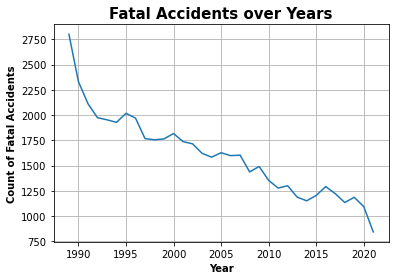

In [185]:
#Plot the chart
crash_years_count.plot(kind="line")

#Set Chart Title
plt.title("Fatal Accidents over Years",weight="bold",fontsize=15)
plt.xlabel("Year",weight="bold",fontsize=10)
plt.ylabel("Count of Fatal Accidents",weight="bold",fontsize=10)
plt.grid()

In [84]:
#Question 2: Gender Male vs Female over time(Line Chart) Which gender is likely to get into fatal accidents
#reformat table to answer above
gender_demographics = crash_data.loc[:, ["Year","Gender","Crash ID"]]

In [163]:
# Calc for male
male = gender_demographics[gender_demographics['Gender'] == 'Male']
male_years_group = male.groupby(["Year"])
male_years_group_count = male_years_group["Crash ID"].count()
# Calc for female
female = gender_demographics[gender_demographics['Gender'] == 'Female']
female_years_group = female.groupby(["Year"])
female_years_group_count = female_years_group["Crash ID"].count()

In [158]:
#annotate 1: features in cars make a difference - https://rac.com.au/car-motoring/info/future_history-of-car-safety
#annotate 2: road action plans in australia https://www.roadsafety.gov.au/action-plan/2018-2020
#fatality trends: https://roadsafety.transport.nsw.gov.au/statistics/fatalitytrends.html
#road safety measures: https://www.police.vic.gov.au/road-safety-0

In [167]:
gender_years_group = pd.DataFrame({"Male":male_years_group_count,
                                   "Female":female_years_group_count})

gender_years_group

,Male,Female
Year,,
1989,1985,815
1990,1634,697
1991,1484,629
1992,1348,625
1993,1393,560
1994,1338,589
1995,1413,604
1996,1406,564
1997,1206,561


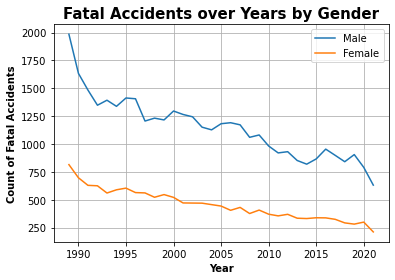

In [183]:
gender_years_group.plot(kind="line")
plt.title("Fatal Accidents over Years by Gender",weight="bold",fontsize=15)
plt.xlabel("Year",weight="bold",fontsize=10)
plt.ylabel("Count of Fatal Accidents",weight="bold",fontsize=10)
plt.grid()

In [186]:
plt.savefig("Fatal Accidents Over Years By Gender.png")

<Figure size 432x288 with 0 Axes>